<a href="https://colab.research.google.com/github/JamesPeralta/Gymnos/blob/master/Neural-Network/Iteration1/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gymnos Iteration 1
## Gymnos iteration 1 will use a single stream 2D convolutional neural network. For each video we will be passing in only one frame and the AIs prediction will be based on the single frame. Therefore the first iteration only analyzes spatial patterns.


---
## Uploading all custom modules into the Instance

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.9MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
# Upload the DataGenerator Module
data_generator_id = '1ICelbrinwuSz6E9I4UbriLy3icM9xNAH'
gymnos_DataGenerator = drive.CreateFile({'id': data_generator_id})
gymnos_DataGenerator.GetContentFile('GymnoDataGenerator_i1.py')

# Upload the HelperFunctions Module
helper_functions_id = '1PDgBPl0Z8a8bqbxdvODSdlbmjMexkV8f'
helper_functions = drive.CreateFile({'id': helper_functions_id})
helper_functions.GetContentFile('HelperFunctions_i1.py')

In [3]:
from google.colab import drive
import os
import csv

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


---
## Imports

In [4]:
import GymnoDataGenerator_i1 as gen
import HelperFunctions_i1 as helper

Using TensorFlow backend.


In [0]:
import cv2

---
## Convert videos into Frames

In [0]:
destination = "/content/drive/My Drive/GYMNOS/Video Dataset/Frames/"

In [39]:
squat_videos = "/content/drive/My Drive/GYMNOS/Video Dataset/Squats/FaceView/"
helper.extractFramesFromDirectory(0, squat_videos, destination)

['video4.MOV', 'video3.MOV', 'video2.MOV', 'video1.MOV', 'video0.MOV', 'video5.MOV', 'video6.MOV', 'video7.MOV', 'video8.MOV', 'video15.MOV', 'video16.MOV', 'video17.MOV', 'video18.MOV', 'video19.MOV', 'video21.MOV', 'video22.MOV', 'video23.MOV', 'video24.MOV', 'video25.MOV', 'video26.MOV', 'video27.MOV', 'video28.MOV', 'video29.MOV', 'video30.MOV', 'video31.MOV', 'IMG_8667.TRIM.MOV', 'IMG_8685.TRIM.MOV', 'IMG_8688.TRIM.MOV', 'IMG_8687.TRIM.MOV', 'IMG_8685 (1).TRIM.MOV', 'IMG_8686.TRIM.MOV', 'IMG_8689.TRIM.MOV', 'IMG_8689 (1).TRIM.MOV', 'IMG_8687 (1).TRIM.MOV']
Finished processing: video4.MOV. Ended at video: 103
Finished processing: video3.MOV. Ended at video: 204
Finished processing: video2.MOV. Ended at video: 315
Finished processing: video1.MOV. Ended at video: 404
Finished processing: video0.MOV. Ended at video: 451
Finished processing: video5.MOV. Ended at video: 562
Finished processing: video6.MOV. Ended at video: 676
Finished processing: video7.MOV. Ended at video: 828
Finished

In [0]:
overhead_videos = "/content/drive/My Drive/GYMNOS/Video Dataset/Overhead Press/FaceView/"
helper.extractFramesFromDirectory(2751, overhead_videos, destination)

['video12.MOV', 'video11.MOV', 'video10.MOV', 'video2.MOV', 'video1.MOV', 'video0.MOV', 'video13.MOV', 'video14.MOV', 'video15.MOV', 'video16.MOV', 'video17.MOV', 'video18.MOV', 'video19.MOV', 'video20.MOV', 'video21.MOV', 'video22.MOV', 'video23.MOV', 'video24.MOV', 'video25.MOV', 'video28.MOV', 'IMG_8667.TRIM.MOV', 'IMG_8685.TRIM.MOV', 'IMG_8687.TRIM.MOV', 'IMG_8687 (1).TRIM.MOV', 'IMG_8689.TRIM.MOV', 'IMG_8688.TRIM.MOV', 'IMG_8688 (1).TRIM.MOV', 'IMG_8689 (1).TRIM.MOV', 'IMG_8685 (1).TRIM.MOV']
Finished processing: video12.MOV. Ended at video: 2845
Finished processing: video11.MOV. Ended at video: 2927
Finished processing: video10.MOV. Ended at video: 3030
Finished processing: video2.MOV. Ended at video: 3073
Finished processing: video1.MOV. Ended at video: 3114
Finished processing: video0.MOV. Ended at video: 3156
Finished processing: video13.MOV. Ended at video: 3240
Finished processing: video14.MOV. Ended at video: 3302
Finished processing: video15.MOV. Ended at video: 3356
Finis

---
## Create a labels and partitions CSVs


---
## Read in the labels and partitions CSVs


In [0]:
partition_location = "/content/drive/My Drive/GYMNOS/Video Dataset/partitions.csv"
labels_location = "/content/drive/My Drive/GYMNOS/Video Dataset/labels.csv"

partition = helper.readPartitionCsv(partition_location)
labels = helper.readLabelsCsv(labels_location)

In [9]:
print(len(partition["train"]))
print(len(partition["validation"]))
print(len(partition["test"]))

3101
886
444


--- 
## Initialize the DataGenerator

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Parameters
params = {'data_location': "/content/drive/My Drive/GYMNOS/Video Dataset/Test/",
          'dim': (224, 224, 3),
          'batch_size': 64,
          'n_classes': 2,
          'shuffle': True}

train_generator = gen.DataGenerator(partition["train"], labels, **params)
validation_generator = gen.DataGenerator(partition["validation"], labels, **params)

In [0]:
images, labels = train_generator.__getitem__(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

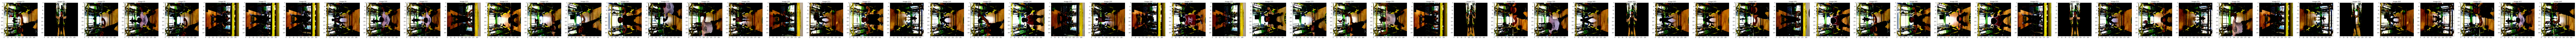

In [13]:
helper.show_images(images)

---
## Add TPU Support

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.train import RMSPropOptimizer
from tensorflow.keras.losses import binary_crossentropy

---
## Create the model


In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer
# Freeze all of the layers from the Conv base because we are performing transfer learning
for layer in base_model.layers:
  layer.trainable = False
  
for layer in base_model.layers:
  print(layer, layer.trainable)

In [0]:
model = Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.summary()

In [0]:
# Convert model to TPU version
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
            model,
            strategy=tf.contrib.tpu.TPUDistributionStrategy(
            tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

In [0]:
tpu_model.compile(optimizer=RMSPropOptimizer(learning_rate=1e-3), 
              loss=binary_crossentropy,
              metrics=['acc'])

In [0]:
train_generator.__len__()

In [0]:
history = tpu_model.fit_generator(train_generator,
                                  steps_per_epoch=train_generator.__len__(),
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=validation_generator.__len__(),
                                  verbose=1)